# Metadata

```yaml
Course:   DS 5100
Module:   05 Numpy HW
Topic:    Capital Asset Pricing Model (CAPM)
Author:   R.C. Alvarado (revised)
Date:     7 July 2023
```

# Student Info

* Name: Sarah Hall
* Net ID: CEJ2VH
* URL of this file in GitHub: https://github.com/CEJ2VH/DS5100-activities/blob/main/activities/M05-HW-3.ipynb

# Instructions

In your **private course repo on Rivanna**, use this Jupyter notebook and the data file `capm_market_data.csv` to write code that performs the tasks below. The data file is in the HW directory of this module in the course repo.

Save your notebook in the `M05` directory.

Remember to add and commit these files to your repo. 

Then push your commits to your repo on GitHib.

Be sure to fill out the **Student Info** block above.

To submit your homework, save the notebook as a PDF and upload it to GradeScope, following the instructions.

**TOTAL POINTS: 10**

# Overview

<!-- In this exer Use NumPy and functions to 
* compute a stock's CAPM beta
* perform sensitivity analysis
* understand how the data points impact the beta estimate
 -->
 
In finance, a capital asset pricing model (CAPM) is a single-factor regression model used to explain and predict excess stock returns. 

There are better, more accurate models, but CAPM has its uses. 

For example, the **market beta** $\beta_i$ a useful output.

Here is the formula for calculating the expected excess return:

$E[R_i] - R_f  = \beta_i ( E[R_m] - R_f )$

where:

* $ER_i$: expected return of stock $i$
* $R_f$: risk-free rate
* $\beta_i$: market beta of the stock
* $ER_m - R_f$: market risk premium

**Review the instructions below to complete the requested tasks.**

**TOTAL POINTS: 10**

# Setting Up

Import [NumPy](https://numpy.org/doc/stable/)

In [1]:
import numpy as np

Define Risk-free Treasury rate. You will use this constant below.

In [2]:
R_f = 0.0175 / 252

# Prepare the Data

We import the data and convert it into usable Numby arrays.

**Read in the market data**

The values are closing prices, adjusted for splits and dividends.

The prefixes of the second two columns are based on the following codes:
* SPY is an ETF for the S&P 500 (i.e. the stock market as whole)
* AAPL stands for Apple  

In [3]:
data_file = "capm_market_data.csv"

In [4]:
data_2D = np.array([row.strip().split(',') for row in open(data_file, 'r').readlines()])

**Separete columns from the data** 

In [5]:
COLS = np.str_(data_2D[0])

In [6]:
COLS

np.str_("['date' 'spy_adj_close' 'aapl_adj_close']")

**Separate columns by data types**

Numpy wants everything to in a data structure to be of the same type.

In [7]:
DATES = data_2D[1:, 0]

In [8]:
RETURNS = data_2D[1:, 1:].astype('float')

# Task 1 

(1 PT) 

Print the first 5 rows of the `RETURNS` table.

In [9]:
# CODE HERE
print(RETURNS[0:5])

[[321.55578613 298.82995605]
 [319.12091064 295.92471313]
 [320.33837891 298.28271484]
 [319.43765259 296.87988281]
 [321.1401062  301.6555481 ]]


# Task 2 

(1 PT) 

Print the first five values from the SPY column in `RETURNS`.

Then do the same for the AAPL column.

Use one cell for each operation.

In [64]:
# CODE HERE
#SPY column
print(RETURNS[:5, 0])


[321.55578613 319.12091064 320.33837891 319.43765259 321.1401062 ]


In [23]:
# AAPL column
print(RETURNS[:5, 1])

[298.82995605 295.92471313 298.28271484 296.87988281 301.6555481 ]


# Task 3 

(1 PT)

Compute the excess returns by subtracting the constant `R_f` from `RETURNS`.

Save the result as numpy 2D array (i.e. a table) named `EXCESS`.

Print the LAST five rows from the new table.

In [65]:
# CODE HERE
EXCESS=RETURNS-R_f
print(EXCESS[-5:])

[[314.37993544 383.00994032]
 [317.58992689 383.67992323]
 [314.83992689 381.90993422]
 [318.91994398 388.22994154]
 [321.84993666 390.89992445]]


# Task 4 

(1 PT)

Make a simple [scatterplot using Matplotlib](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) with SPY excess returns on the x-axis, AAPL excess returns on the y-axis.

Hint: Use the following code:

```python
from matplotlib.pyplot import scatter

scatter(<x>, <y>)
```
Replace `<x>` and `<y>` with the appropriate vectors.

You may want to save the vectors for the SPY and AAPL columns as `x` and `y` respectively. This will make it visually easier to perform Task 6.

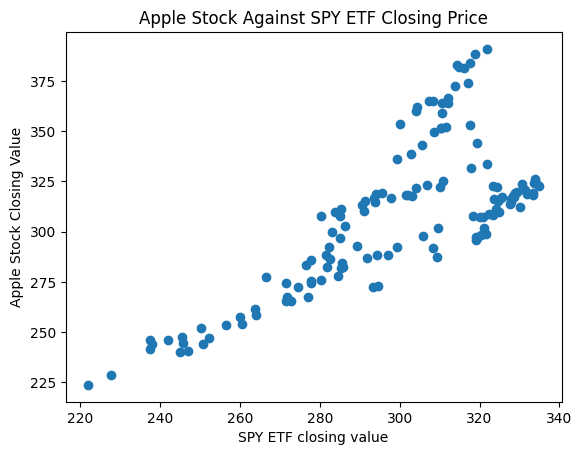

In [66]:
# CODE HERE
import matplotlib.pyplot as plt
#data_RETURNS = RETURNS[1: , :] no longer needed, solved why I was getting the headers included
x=EXCESS[:,0] 
y=EXCESS[:,1]
plt.scatter(x,y)
plt.title("Apple Stock Against SPY ETF Closing Price")
plt.xlabel("SPY ETF closing value")
plt.ylabel("Apple Stock Closing Value")
plt.show()


# Taks 5 

(3 PTS)

Use the **normal equation**, listed below, to compute the Regression Coefficient Estimate of the data plotted above, $\hat\beta_i$.

Note that $x^T$ denotes the transpose of $x$.

$\begin{aligned} \hat\beta_i=(x^Tx)^{−1}x^Ty \end{aligned}$ 

Use the Numpy functions for matrix to do this &mdash; multiplication, transpose, and inverse. 

Note, however, that since $x$ in this case a single column matrix, i.e. a vector, the result of $x'x$ will be a scalar, which is not invertable. So you can just invert the result by division, i.e. 

$\hat\beta_i = \large\frac{1}{x^Tx} \small(x^Ty)$

Be sure to review what these operations do, and how they work, if you're a bit rusty.

**You should find that $\hat\beta_i > 1$.**

This means that the risk of AAPL stock, given the data, and according to this particular (flawed) model, is higher relative to the risk of the S&P 500.


In [68]:

# So X is the price of  SPY ETF at closing and y is the price of Apple stock at closting
#My understanding is that we would find B_i for every value of i, so this should return a vector instead?
#Going to use the dot product to return a singular value, but if I didn't I would multiply x.T by x rather 
#doing the dot product
normaleq=1/((x.T).dot(x))*((x.T).dot(y))


In [69]:
#Quick check to make sure it's bigger than one, which it is
normaleq=float(normaleq)
normaleq

1.029980294240815

# Task 6

(3 PTS)

**Measuring Beta Sensitivity to Dropping Observations (Jackknifing)**

Let's understand how sensitive the beta is to each data point.   
We want to drop each data point (one at a time), compute \\(\hat\beta_i\\) using our formula from above, and save each measurement.

Write a function called `beta_sensitivity()` with these specs:

- Take numpy arrays x and y as inputs.
- For each observation i, compute the beta without the current observation. You can use a `lambda` function for this.
- Return a list of tuples each containing the observation row dropped and the beta estimate, i.e. something like `(i, beta_est)`, depending how you've named your variables.

Hint: `np.delete(x, i)` will delete observation i from array x. 

Call `beta_sensitivity()` and print the first five tuples of output.

In [72]:
# I ended up doing a list comprehension, just because I found it easier to troubleshoot my MANY parentheses errors
#But I think a lambda would look pretty similar
def beta_sensitivity(x_arr, y_arr):
    '''
    Returns the beta (slope) between between two vectors

    Args: 
        x_arr: first vector (independent variable)
        y_arr: second bector (dependent variable)

    Returns:
        Vector of the computation of the normal equation for each x,y value pair
    '''
    
    droprowbeta=[(i, float((1/(np.delete(x_arr,i).T).dot(np.delete(x_arr,i)))*((np.delete(x_arr,i).T.dot(np.delete(y_arr,i)))))) for i in range(len(x_arr))]
    return droprowbeta
    

In [71]:
jackknife=beta_sensitivity(x,y)

In [63]:
print(jackknife[:5])

[(0, 1.030847730172396), (1, 1.0308516176393125), (2, 1.0308255236222597), (3, 1.0308357542837525), (4, 1.030759501843587)]
